# Kuramoto model

Elena Candellone, Sara Ghivarello, Pietro Traversa

## Question 1

The set of ODEs described by the Kuramoto model is given by:
\begin{align}
	\dot{\theta}_i&=\omega_i+\sum\limits_{j=1}^N\frac{K}{N}\sin(\theta_j-\theta_i),\;\;\;\;\;\;\;i=1,...,N\;\;\;\ (1)
\end{align}
The order parameter is defined as:
\begin{align}
	r(t)e^{i\psi(t)}&=\frac{1}{N}\sum\limits_{j=1}^{N}e^{i\theta_j(t)}\;\;\;\;(2)
\end{align}
Aside from being a handy tool to quantitatively examine a system of coupled oscillators, the order parameter can also be used to simplify the Kuramoto model given by the combination of equations (1) and (2). Taking the order parameter from equation (2), and multiplying left and right by some factor $e^{-i\theta_i}$ gives
\begin{align}
    re^{i(\psi-\theta_i)}&=\frac{1}{N}\sum\limits_{j=1}^Ne^{i(\theta_j-\theta_i)}
\end{align}
Equating the imaginary parts we get
\begin{align}
    r\sin(\psi-\theta_i)&=\frac{1}{N}\sum\limits_{j=1}^N\sin(\theta_j-\theta_i)
\end{align}
Finally, substituting this result into equation (1) we obtain a much nicer version of the Kuramoto model:
\begin{align}
	\dot{\theta}_i&=\omega_i+Kr\sin(\psi-\theta_i),\;\;\;\;\;\;\;i=1,...,N
\end{align}
Using this form of the Kuramoto model, it is much simpler to recognise the dependence on the mean-field quantities $r$ and $\psi$. The coupling term $Kr\sin(\psi-\theta_i)$ tends to bring the $i^\text{th}$ phase closer to the mean-field phase $\psi$, whilst the effective coupling strength is proportional to the coherence term $r$.

## Question 2

In [ ]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import tqdm
from matplotlib.pyplot import cm

In the following, we define a function that computes the set of ODEs $\dot{\theta}_i=\omega_i+Kr\sin(\psi-\theta_i)$, which we called dthetadt, by giving as input parameters:
* time interval $t=[0,100]$
* initial distribution of phases $\theta_0$
* initial distribution of frequencies $\omega_0$
* coupling constant $K$ 
* number of oscillatory rotors $N$

In [2]:
def kuramoto(t, theta, omega, K, N):
    a = np.mean(np.exp(1j*theta))
    r = np.abs(a)
    phi = np.angle(a)
    dthetadt = omega + K*r*np.sin(phi - theta)
    return dthetadt

By drawing the initial conditions on $\theta$ from a uniform distribution, and the frequencies $\omega$ from a centered Gaussian distribution, we solved the set of differential equations adopting the so called adaptive Runge-Kutta method (importing $solve\_ivp$ from scipy.integrate) for a time interval between 0 and 100.
We fixed the number of rotors N to 10, and by changing the parameter K, we obtained 4 plots (for K = $[0.0 , 0.1 , 0.5 , 1 , 2]$). 

Physically, the parameter K represents the strength of the interactions between rotors, which forces them to couple and to synchronize their frequencies. Aside from random effects, after the relaxation time, we see a stronger synchronization for bigger values of K. We also notice a relevant sensitivity to initial conditions of the frequencies: if such initial frequency comes from the tails of the gaussian distribution, the corresponding rotor will likely not couple with the oscillation of the collective system.

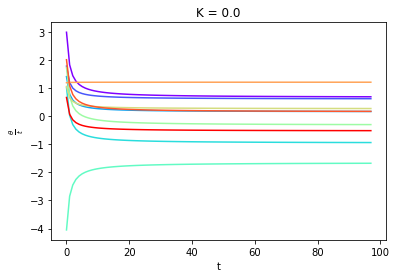

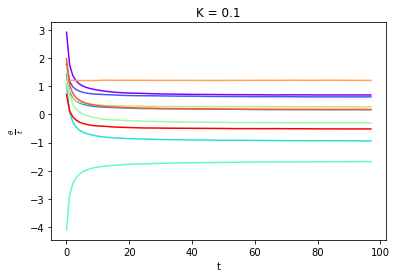

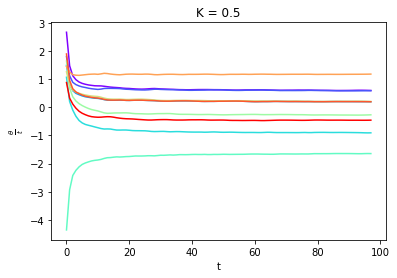

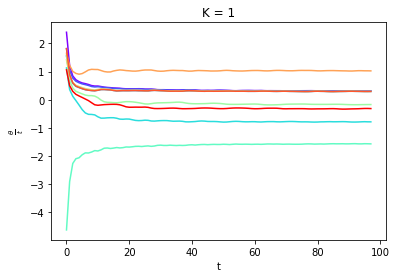

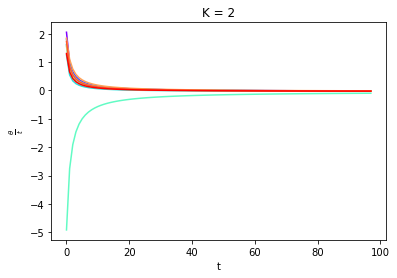

In [3]:
N = 10
K = [0.0,0.1,0.5,1,2]
t_eval = np.arange(0, 100, 1)
theta_0 = np.random.uniform(low=-np.pi, high=np.pi, size=N)
omega_0 = np.random.normal(loc=0.0, scale=1.0, size=N)

color = cm.rainbow(np.linspace(0, 1, N))
for x in K:
    sol = solve_ivp(kuramoto, [0,100], theta_0, method='RK45', args=(omega_0,x,N), t_eval = t_eval)
    theta = sol.y
    t = sol.t
    plt.figure(x*10)
    plt.title('K = ' +str(x))
    for i,c in zip(range(N),color):
        plt.plot(theta[i][1:-1]/t[1:-1], c = c)
    plt.xlabel('t')
    plt.ylabel(r'$\frac{\theta}{t}$')
        
plt.show()

## Question 3

In the following we define a function which calculates the absolute value $r(t)$ of the order parameter at a certain moment in time.

In [4]:
def order_parameter(theta,N):
    R = 1/N * np.sum(np.exp(1j*theta),0)
    return np.abs(R)

In order to suppress randomness due to a system of finite size, we rescale to 0 the actual mean of our sample of initial frequencies. We plot $r(t)$ for different values of K fixing N to 100.

25it [00:00, 55.18it/s]


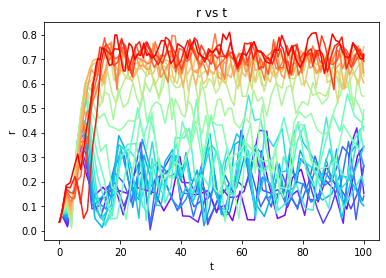

In [5]:
N = 100
K = np.linspace(1,2,25)
t_eval = np.arange(0, 100, 1)
theta_0 = np.random.uniform(low=-np.pi, high=np.pi, size=N)
omega_0 = np.random.normal(loc=0.0, scale=1.0, size=N)
omega_0 -= np.mean(omega_0)

r = []
color = cm.rainbow(np.linspace(0, 1, len(K)))
for k,c in tqdm.tqdm(zip(K, color)):
    sol = solve_ivp(kuramoto, [0,100], theta_0, method='RK45', args=(omega_0,k,N))
    theta = sol.y
    t = sol.t
    r.append(order_parameter(theta,N))
    plt.plot(t,order_parameter(theta,N),label = 'K = '+str(k), c = c)
plt.title('r vs t')
plt.xlabel('t')
plt.ylabel('r')
#plt.legend()
plt.show()

We chose to adopt a rainbow colouring of our plot in order to evidence the evolution of $r(t)$ depending on the parameter K: cold colors correspond to small values of K, while hot colours to big values of K.\
This result does not surprise us: the smaller the strength of the coupling interaction, the weaker is the synchronization of the rotors ($r=0$ corresponds to no synchronization at all, while $r=1$ corresponds to complete synchronization).

## Question 4

In the following we compute an average of the order parameter over $Nrep=100$ independent simulations, avoiding the initial times when the system is not relaxed yet.

In [6]:
N_rep = 100
N = 100
K = np.linspace(1,2,25)
t_eval = np.arange(0, 100, 1)
r = []
for n in tqdm.tqdm(range(N_rep)):
    theta_0 = np.random.uniform(low=-np.pi, high=np.pi, size=N)
    omega_0 = np.random.normal(loc=0.0, scale=1.0, size=N)
    omega_0 -= np.mean(omega_0)
    r_k = []
    for k in K:
        sol = solve_ivp(kuramoto, [0,100], theta_0, method='RK45', args=(omega_0,k,N), t_eval = t_eval)
        theta = sol.y
        t = sol.t
        r_k.append(np.mean(order_parameter(theta,N)[49:-1]))
    r.append(r_k)

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:47<00:00,  2.11it/s]


We plot these mean stationary values of $\bar{r}$ with respect to the coupling parameter K, and as expected we get an increasing function which remains between $[0,1]$. 

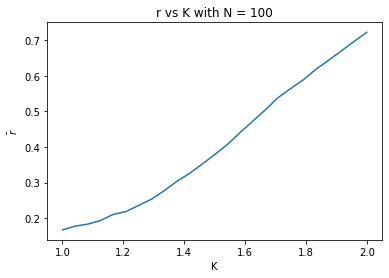

In [7]:
K = np.linspace(1,2,25)
r_tot = np.mean(r,axis=0)
plt.plot(K,r_tot)
plt.xlabel('K')
plt.ylabel(r'$\bar{r}$')
plt.title('r vs K with N = 100')
plt.show()

## Question 5

In the following we vary the number of rotors in the system N, and we perform $Nrep$ simulations.

In [10]:
N = [100, 500, 2000, 5000, 15000, 100000]
N_rep = [300, 10, 50, 30, 10,1]
K = np.linspace(1,2,25)
t_eval = np.arange(0, 100, 1)
r_totot = []
for i in tqdm.tqdm(range(len(N))):
    r = []
    for n in range(N_rep[i]):
        theta_0 = np.random.uniform(low=-np.pi, high=np.pi, size=N[i])
        omega_0 = np.random.normal(loc=0.0, scale=1.0, size=N[i])
        omega_0 -= np.mean(omega_0)
        r_k = []
        for k in K:
            sol = solve_ivp(kuramoto, [0,100], theta_0, method='RK45', args=(omega_0,k,N[i]), t_eval = t_eval)
            theta = sol.y
            t = sol.t
            r_k = np.concatenate((r_k, [np.mean(order_parameter(theta,N[i])[49:-1])]))
        r.append(r_k)
    r_tot = np.mean(r,axis=0)
    r_totot.append(r_tot)

100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [09:15<00:00, 92.55s/it]


## Question 6

We plot the mean stationary values $\bar{r}$ as a function of K, as we did for question 4, this time for various number of rotors.

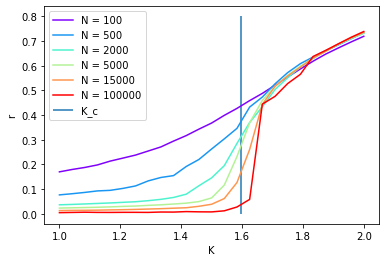

In [11]:
N = [100, 500, 2000, 5000, 15000, 100000]
color = cm.rainbow(np.linspace(0, 1, len(N)))
K = np.linspace(1,2,25)
for i,c in zip(range(len(N)),color):
    plt.plot(K,r_totot[i], label = 'N = ' +str(N[i]), c = c)
plt.vlines(2*np.sqrt(2/np.pi), 0, 0.8, label = 'K_c')
plt.xlabel('K')
plt.ylabel('r')
plt.legend()
plt.show()

## Question 7

We observe that as the value of N increases, the curves become sharper around the critical point $K_c \approx 1.6$. This behavior for large values of N resembles a second order phase transition: before the critical point, the order parameter is almost zero, corresponding to the situation where all the oscillators are complitely asynchronous (and so corresponding to a disordered phase); after the critical value the oscillators syncronise and the order parameter becomes non vanishing (ordered phase). 

Indeed, one can show that in the thermodinamical limit a second order phase transition occurs when:
\begin{align}
    K=K_c=\frac{2}{\pi g(0)}
\end{align}
Where $g(\omega)$ is the frequencies pdf. Finally, by using that in this homework the pdf is gaussian, and so $g(0) = \frac{1}{\sqrt{2 \pi}}$, one gets:
\begin{align}
    K_c= \sqrt{\frac{8}{\pi}} \approx 1.6
\end{align}
We can therefore conclude that the results of the simulation are compatible with the location of the phase transition